In [2]:
#load libraries
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib.colors import rgb2hex
import sctoolbox.utilities as utils
import sctoolbox.tools as tools
import sctoolbox.plotting as pl
from sctoolbox.plotting import *

In [3]:
#load adata
adata = utils.load_h5ad("/mnt/agnerds/user/aviral.jain/all-snRNA.h5ad")

[INFO] The adata object was loaded from: ../../downloads/all-snRNA.h5ad


In [4]:
adata.obs

,sample,n_counts,n_genes,percent_mito,doublet_score,dissociation_score,cell_type_original,patient_region_id,donor_id,patient_group,...,tissue_type,cell_type,assay,disease,organism,sex,tissue,self_reported_ethnicity,development_stage,observation_joinid
AAACCCACAAAGGAGA-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1,CK158,2598.0,1678,0.115473,0.000324,0.137064,Fibroblast,control_P1,P1,myogenic,...,tissue,fibroblast of cardiac tissue,10x 3' v3,normal,Homo sapiens,male,heart left ventricle,European,44-year-old human stage,ncLQ^>4V~0
AAACCCACAGAGATGC-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1,CK158,13003.0,4187,0.053834,0.003417,-0.006482,Cardiomyocyte,control_P1,P1,myogenic,...,tissue,cardiac muscle myoblast,10x 3' v3,normal,Homo sapiens,male,heart left ventricle,European,44-year-old human stage,OIH`^@&ZXS
AAACCCAGTAACGGTG-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1,CK158,6365.0,2700,0.047133,0.032239,0.005020,Cardiomyocyte,control_P1,P1,myogenic,...,tissue,cardiac muscle myoblast,10x 3' v3,normal,Homo sapiens,male,heart left ventricle,European,44-year-old human stage,e8Qt8qYxVF
AAACCCAGTCCAGAAG-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1,CK158,627.0,519,0.000000,0.000365,0.087506,Fibroblast,control_P1,P1,myogenic,...,tissue,fibroblast of cardiac tissue,10x 3' v3,normal,Homo sapiens,male,heart left ventricle,European,44-year-old human stage,0SKw_<k7u@
AAACCCAGTCGTCGGT-1_1_1_1_1_1_1_1_1_1_1_1_1_1_1,CK158,4488.0,1999,0.155971,0.004785,-0.001798,Cardiomyocyte,control_P1,P1,myogenic,...,tissue,cardiac muscle myoblast,10x 3' v3,normal,Homo sapiens,male,heart left ventricle,European,44-year-old human stage,B)sH)`nDwH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTCATGGTCTTGCTC-1,CK376,1153.0,940,0.000000,0.521381,0.066911,Fibroblast,IZ_P16,P16,ischemic,...,tissue,fibroblast of cardiac tissue,10x 3' v3,myocardial infarction,Homo sapiens,male,heart left ventricle,European,66-year-old human stage,sQ@-q!5@uO
TTTCCTCAGGTTCATC-1,CK376,657.0,570,0.456621,0.006264,0.019443,Lymphoid,IZ_P16,P16,ischemic,...,tissue,lymphoid lineage restricted progenitor cell,10x 3' v3,myocardial infarction,Homo sapiens,male,heart left ventricle,European,66-year-old human stage,^KI8(5r80@
TTTCGATTCCGGTAAT-1,CK376,808.0,673,0.000000,0.001830,0.104566,Myeloid,IZ_P16,P16,ischemic,...,tissue,immature innate lymphoid cell,10x 3' v3,myocardial infarction,Homo sapiens,male,heart left ventricle,European,66-year-old human stage,upGc?V#Y@~
TTTGACTTCGCCAACG-1,CK376,862.0,717,0.232019,0.013721,0.024106,Endothelial,IZ_P16,P16,ischemic,...,tissue,cardiac endothelial cell,10x 3' v3,myocardial infarction,Homo sapiens,male,heart left ventricle,European,66-year-old human stage,URA;I!G2Ye


In [5]:
adata.var

,feature_is_filtered,feature_name,feature_reference,feature_biotype,feature_length
feature_id,,,,,
ENSG00000177613,False,CSTF2T,NCBITaxon:9606,gene,4110
ENSG00000128918,False,ALDH1A2,NCBITaxon:9606,gene,8127
ENSG00000143977,False,SNRPG,NCBITaxon:9606,gene,1764
ENSG00000196177,False,ACADSB,NCBITaxon:9606,gene,6234
ENSG00000244482,False,LILRA6,NCBITaxon:9606,gene,2718
...,...,...,...,...,...
ENSG00000179152,False,TCAIM,NCBITaxon:9606,gene,8743
ENSG00000248174,False,LINC02268,NCBITaxon:9606,gene,3422
ENSG00000249875,False,RP11-51M24.1,NCBITaxon:9606,gene,366


In [6]:
adata.layers['smaller_layer'] = adata.X*0.2

In [7]:
adata.layers['smaller_layer']

<191795x29046 sparse matrix of type '<class 'numpy.float32'>'
	with 387171863 stored elements in Compressed Sparse Row format>

In [8]:
#passed parameters:
genes = ['FLT1', 'EGR3', 'KDR', 'PGF', 'VEGFB', 'ADAM17']
genes = 'FLT1'
x_col = "disease"
y_col = "cell_type_original"
x_label = "disease"
y_label = "cell type"
expression_threshold = 0
color_schema = "viridis"
planet_color_schemas = ["Accent", "twilight", "CMRmap", "cividis", "gray", "coolwarm"]
planet_columns = ["n_counts", "n_genes", "percent_mito", "doublet_score", "dissociation_score"]
#mode = 'mean' or 'planet'
mode = 'planet'
#size_value = 'count' or 'percentage'
size_value = 'count'
#color_value = 'expression' or 'percentage_max_expression'
color_value = 'percentage_max'

In [9]:
plot_vars = planet_plot_anndata_preprocess(adata,
                                  x_col,
                                  y_col,
                                  genes = genes,
                                  gene_symbols= 'feature_name',
                                  input_layer = 'raw',
                                  x_col_subset = None,
                                  y_col_subset = ["Mast", "Myeloid", "Fibroblast"],
                              )

/home/ajain/notebooks/test/sctoolbox/plotting/planet_plot.py:113: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_counts = df_counts.groupby([x_col, y_col]).size().reset_index(name='total_count')
/home/ajain/notebooks/test/sctoolbox/plotting/planet_plot.py:116: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_expressed_counts = df_all.groupby([x_col, y_col]).apply(lambda x: count_greater_than_threshold(x[genes], expression_threshold)).reset_index()
/home/ajain/notebooks/test/sctoolbox/plotting/planet_plot.py:119: FutureWarning: The default of observed=False is deprecated and will be changed to True in a futu

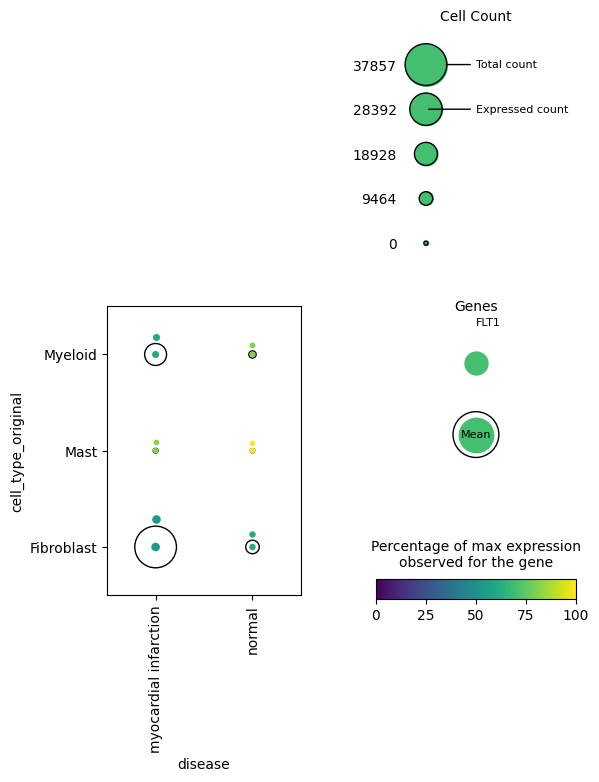

In [10]:
planet_plot_render(plot_vars,
                  x_col,
                  y_col,
                  mode = "planet",
                  size_value = "count",
                  color_value = "percentage_max",
                  use_log_scale = False,
                  planet_columns = genes,
                  color_schema = color_schema,
                  planet_color_schemas = None)

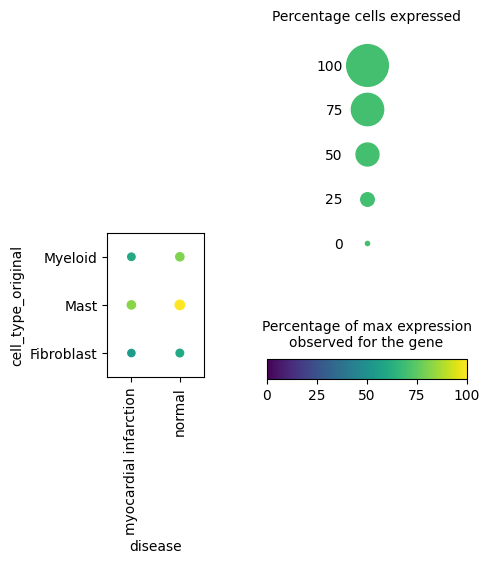

In [11]:
planet_plot_render(plot_vars,
                  x_col,
                  y_col,
                  mode = "mean",
                  size_value = "percentage",
                  color_value = "percentage_max",
                  use_log_scale = False,
                  planet_columns = genes,
                  color_schema = color_schema,
                  planet_color_schemas = None)

In [12]:
#passed parameters:
genes = ['FLT1', 'EGR3', 'KDR', 'PGF', 'VEGFB', 'ADAM17']
x_col = "disease"
y_col = "cell_type_original"
x_label = "disease"
y_label = "cell type"
expression_threshold = 0
color_schema = "viridis"
planet_color_schemas = ["Accent", "twilight", "CMRmap", "cividis", "gray", "coolwarm"]
planet_columns = ["n_counts", "n_genes", "percent_mito", "doublet_score", "dissociation_score"]
#mode = 'mean' or 'planet'
mode = 'planet'
#size_value = 'count' or 'percentage'
size_value = 'count'
#color_value = 'expression' or 'percentage_max_expression'
color_value = 'percentage_max'

In [13]:
all_vars = planet_plot_anndata_preprocess_advanced(adata,
                                  x_col,
                                  y_col,
                                  genes = genes,
                                  gene_symbols= 'feature_name',
                                  input_layer = 'raw',
                                  x_col_subset = None,
                                  y_col_subset = None,
                                  expression_threshold = 0,
                                  planet_columns = planet_columns,
                                  planet_thresholds = [0,0,0,0,0])

/home/ajain/notebooks/test/sctoolbox/plotting/planet_plot.py:232: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_counts = df_counts.groupby([x_col, y_col]).size().reset_index(name='total_count')
/home/ajain/notebooks/test/sctoolbox/plotting/planet_plot.py:235: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_expressed_counts = df_all.groupby([x_col, y_col]).apply(lambda x: pd.Series({total_columns[i]: count_greater_than_threshold(x[total_columns[i]], total_thresholds[i]) for i in range(len(total_columns))})).reset_index()
/home/ajain/notebooks/test/sctoolbox/plotting/planet_plot.py:239: FutureWarning: The d

/home/ajain/notebooks/test/sctoolbox/plotting/planet_plot.py:491: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sc_array[p] = ax.scatter(secondary_x, secondary_y, s=row[planet_column+'_dot_size']**2, c=row[planet_column+PLANET_COLOR_VALUE_SUFFIX],cmap=planet_color_schemas[p], vmin=vmin_array[p], vmax=vmin_array[p])


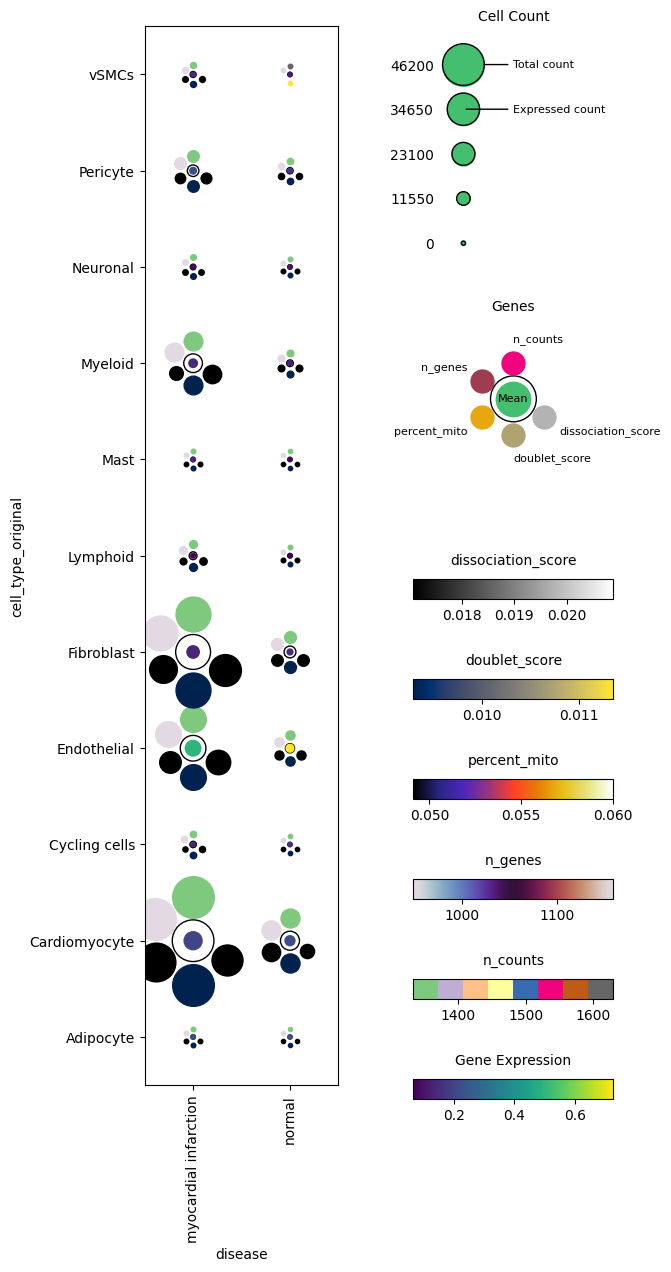

In [14]:
planet_plot_render(all_vars,
                  x_col,
                  y_col,
                  mode = "planet",
                  size_value = "count",
                  color_value = "expression",
                  use_log_scale = False,
                  planet_columns = planet_columns,
                  color_schema = color_schema,
                  planet_color_schemas = planet_color_schemas)

In [15]:
#passed parameters:
genes = ['FLT1', 'EGR3', 'KDR', 'PGF', 'VEGFB', 'ADAM17']
genes = 'FLT1'
x_col = "patient_region_id"
y_col = "cell_type_original"
# x_label = "disease"
# y_label = "cell type"
expression_threshold = 0
color_schema = "viridis"
planet_color_schemas = ["Accent", "twilight", "CMRmap", "cividis", "gray", "coolwarm"]
planet_columns = ["n_counts", "n_genes", "percent_mito", "doublet_score", "dissociation_score"]
#mode = 'mean' or 'planet'
mode = 'planet'
#size_value = 'count' or 'percentage'
size_value = 'count'
#color_value = 'expression' or 'percentage_max_expression'
color_value = 'percentage_max'

In [16]:
all_vars_2 = planet_plot_anndata_preprocess_advanced(adata,
                                  x_col,
                                  y_col,
                                  genes = genes,
                                  gene_symbols= 'feature_name',
                                  input_layer = 'raw',
                                  x_col_subset = None,
                                  y_col_subset = None,
                                  expression_threshold = 0,
                                  planet_columns = planet_columns,
                                  planet_thresholds = [0,0,0,0,0])

/home/ajain/notebooks/test/sctoolbox/plotting/planet_plot.py:232: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_counts = df_counts.groupby([x_col, y_col]).size().reset_index(name='total_count')
/home/ajain/notebooks/test/sctoolbox/plotting/planet_plot.py:235: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_expressed_counts = df_all.groupby([x_col, y_col]).apply(lambda x: pd.Series({total_columns[i]: count_greater_than_threshold(x[total_columns[i]], total_thresholds[i]) for i in range(len(total_columns))})).reset_index()
/home/ajain/notebooks/test/sctoolbox/plotting/planet_plot.py:239: FutureWarning: The d

/home/ajain/notebooks/test/sctoolbox/plotting/planet_plot.py:491: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sc_array[p] = ax.scatter(secondary_x, secondary_y, s=row[planet_column+'_dot_size']**2, c=row[planet_column+PLANET_COLOR_VALUE_SUFFIX],cmap=planet_color_schemas[p], vmin=vmin_array[p], vmax=vmin_array[p])


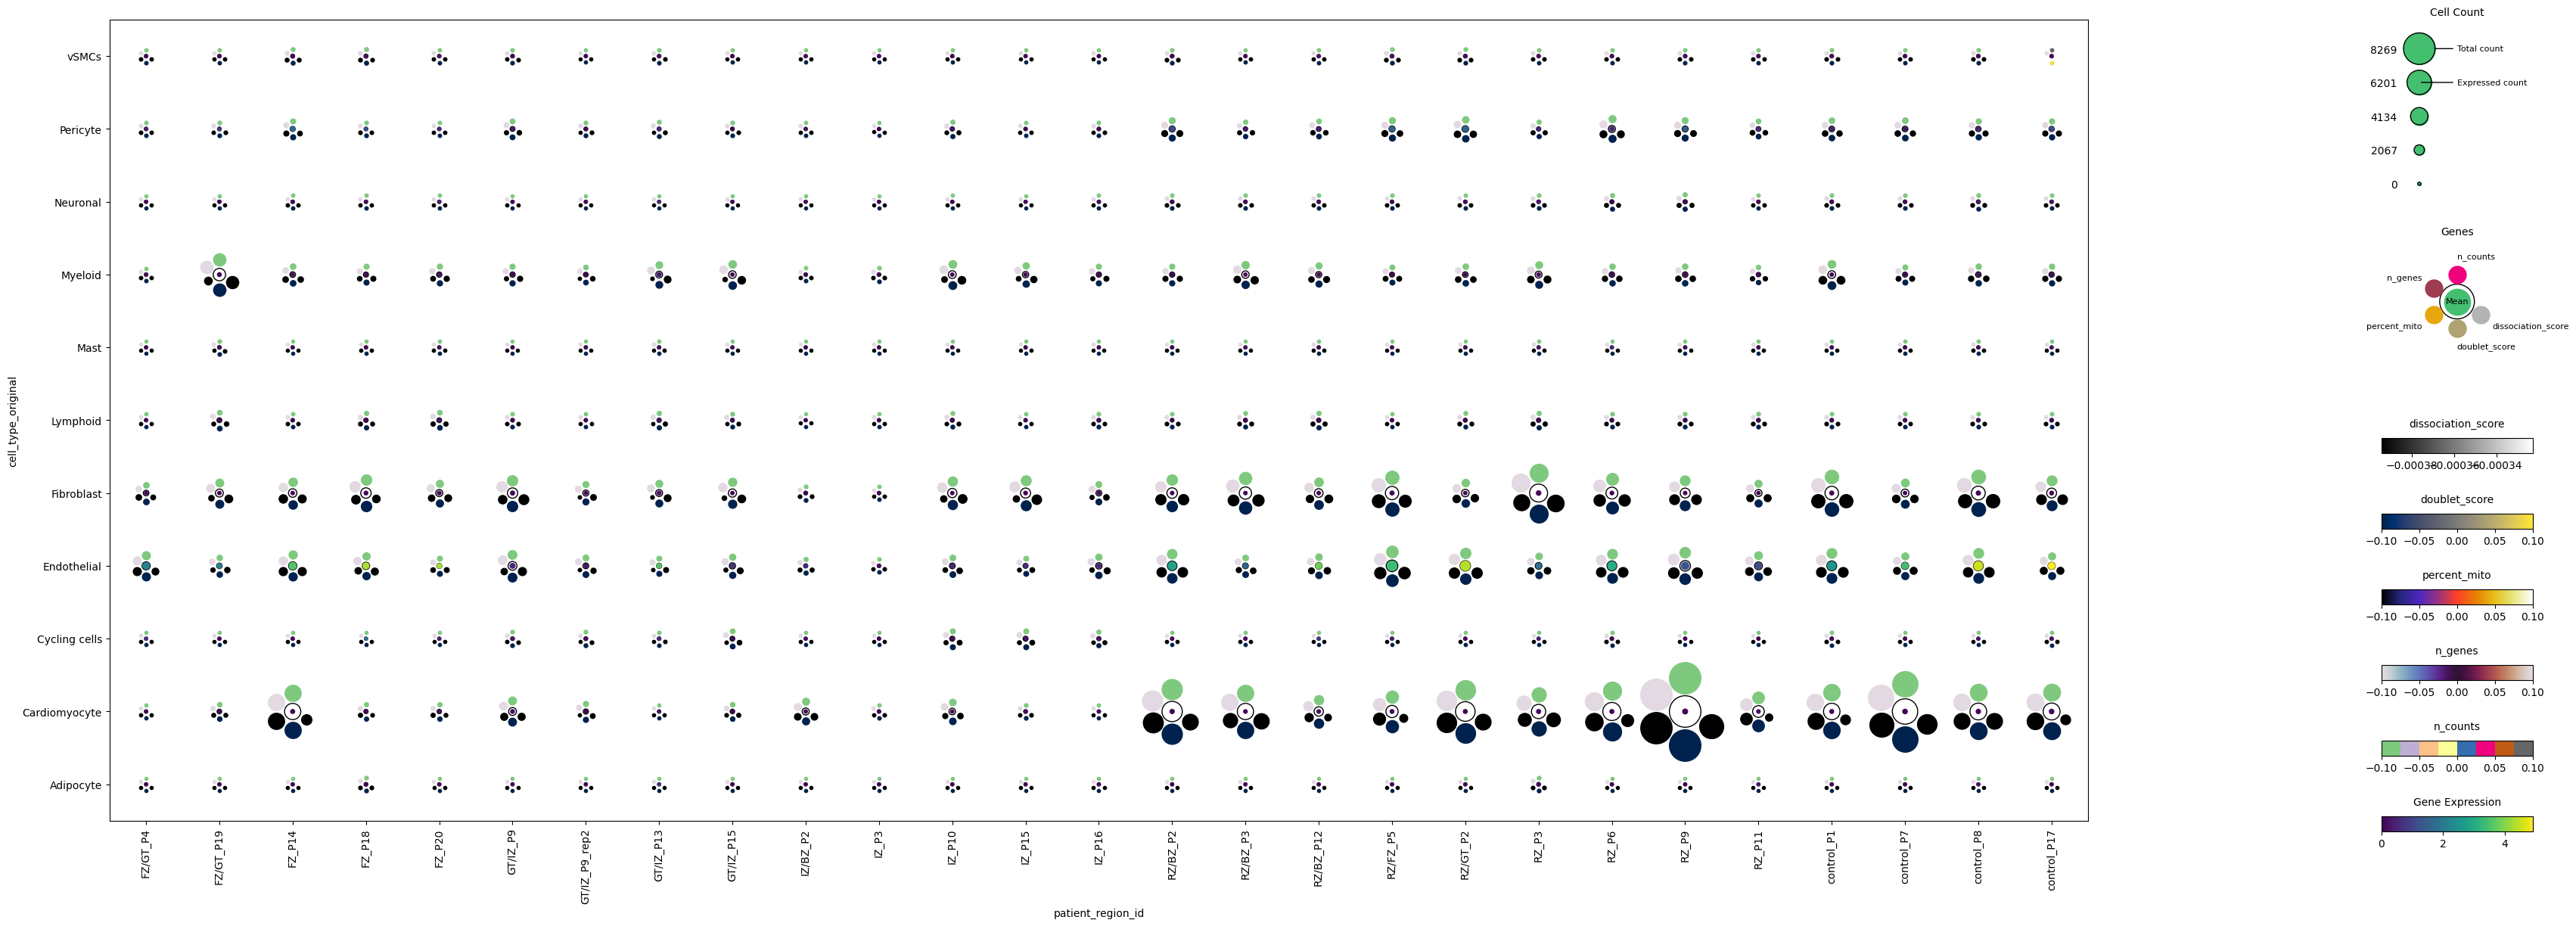

In [17]:
planet_plot_render(all_vars_2,
                  x_col,
                  y_col,
                  mode = "planet",
                  size_value = "count",
                  color_value = "expression",
                  use_log_scale = False,
                  planet_columns = planet_columns,
                  color_schema = color_schema,
                  planet_color_schemas = planet_color_schemas)

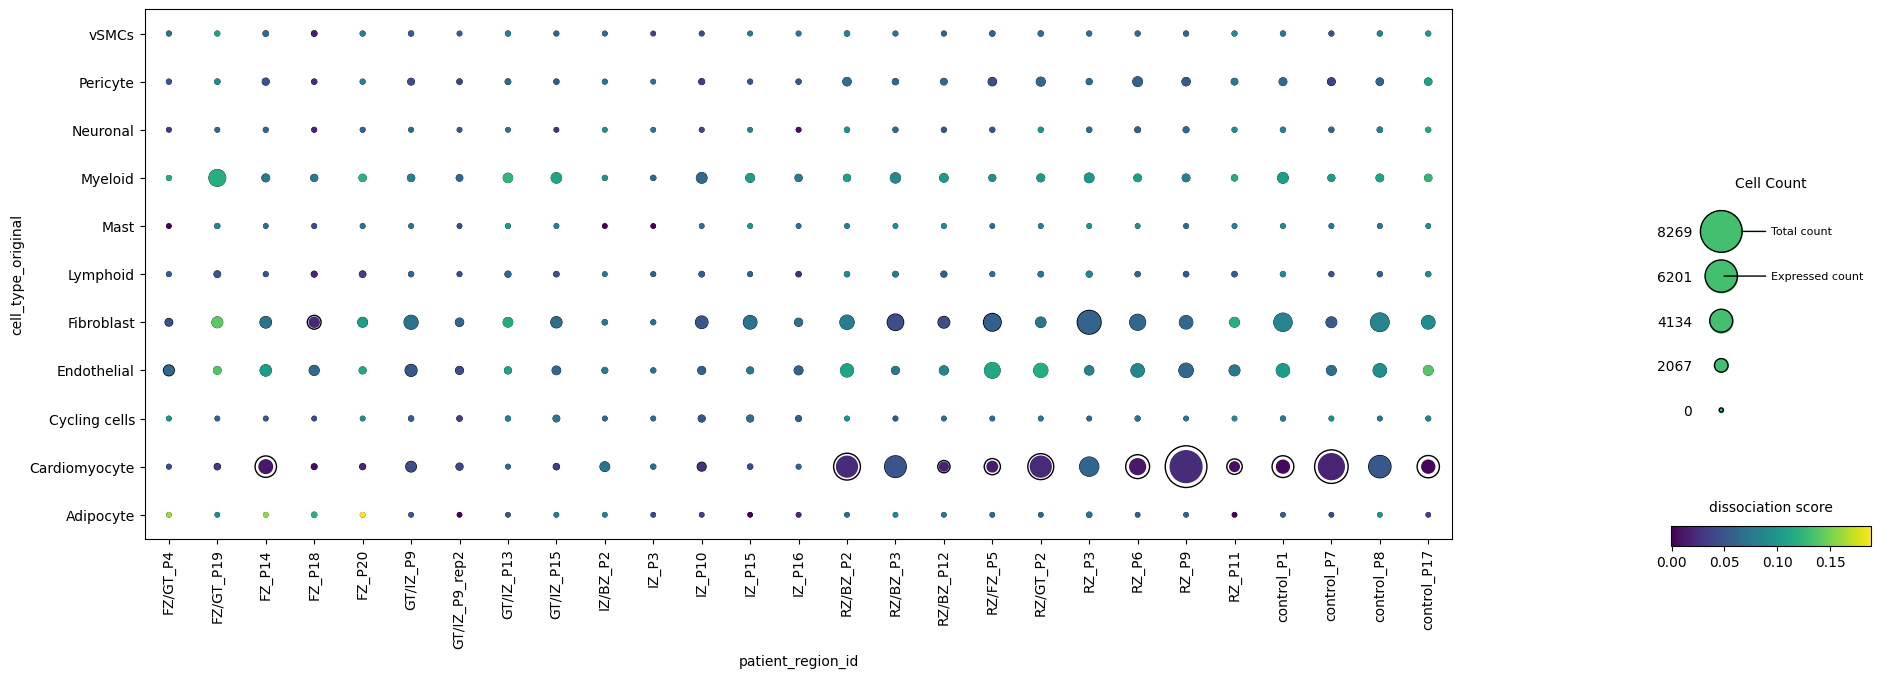

In [18]:
planet_plot_render(all_vars_2,
                  x_col,
                  y_col,
                  mode = "mean",
                  size_value = "count",
                  color_value = "expression",
                  use_log_scale = False,
                  planet_columns = planet_columns,
                  color_schema = color_schema,
                  INNER_SIZE_COUNT_COLUMN="dissociation_score_x",
                  DOT_COLOR_VALUE_COLUMN="dissociation_score_y",
                  COLOR_BAR_TITLE='dissociation score')

In [19]:
all_vars_2

,patient_region_id,cell_type_original,total_count,FLT1_x,n_counts_x,n_genes_x,percent_mito_x,doublet_score_x,dissociation_score_x,FLT1_y,...,dissociation_score_percentage_max_expression,x_steps,y_steps,outer_size,inner_size,n_counts_dot_size,n_genes_dot_size,percent_mito_dot_size,doublet_score_dot_size,dissociation_score_dot_size
0,FZ/GT_P4,Adipocyte,4.0,0.0,4.0,4.0,4.0,4.0,4.0,0.000000,...,85.484923,0,0,3.013061,3.013061,3.013061,3.013061,3.013061,3.013061,3.013061
1,FZ/GT_P4,Cardiomyocyte,54.0,3.0,54.0,54.0,54.0,54.0,42.0,0.055556,...,23.985571,0,1,3.176321,3.137139,3.176321,3.176321,3.176321,3.176321,3.137139
2,FZ/GT_P4,Cycling cells,25.0,9.0,25.0,25.0,25.0,25.0,22.0,0.720000,...,51.422137,0,2,3.081630,3.071835,3.081630,3.081630,3.081630,3.081630,3.071835
3,FZ/GT_P4,Endothelial,1435.0,998.0,1435.0,1435.0,1435.0,1435.0,1079.0,2.216725,...,33.436585,0,3,7.685573,6.523159,7.685573,7.685573,7.685573,7.685573,6.523159
4,FZ/GT_P4,Fibroblast,714.0,55.0,714.0,714.0,713.0,714.0,488.0,0.081232,...,24.563338,0,4,5.331358,4.593421,5.331358,5.331358,5.328093,5.331358,4.593421
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,control_P17,Mast,11.0,4.0,11.0,11.0,11.0,11.0,11.0,0.363636,...,46.733130,26,6,3.035917,3.035917,3.035917,3.035917,3.035917,3.035917,3.035917
293,control_P17,Myeloid,603.0,80.0,603.0,603.0,589.0,603.0,601.0,0.182421,...,65.324056,26,7,4.968920,4.962390,4.968920,4.968920,4.923207,4.968920,4.962390
294,control_P17,Neuronal,103.0,18.0,103.0,103.0,102.0,103.0,101.0,0.281553,...,59.498585,26,8,3.336316,3.329786,3.336316,3.336316,3.333051,3.336316,3.329786
295,control_P17,Pericyte,599.0,338.0,599.0,599.0,586.0,599.0,584.0,1.178631,...,57.138495,26,9,4.955859,4.906881,4.955859,4.955859,4.913412,4.955859,4.906881
